## Import libraries and files

In [26]:
import scipy.io
import scipy.special
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST .mat file
mnist_data = scipy.io.loadmat('mnist_all.mat')

**Sigmoid fuction:**
    $$
    \begin{align}
    g(z) &= \frac{1}{1 + e^{-z}}\\
    p(y_j=1 | \mathrm{x_j}; \mathrm{w}) &= g(\mathrm{w}^T\mathrm{x_j})\\
    p(y_j=0 | \mathrm{x_j}; \mathrm{w}) &= 1 - g(\mathrm{w}^T\mathrm{x_j})
    \end{align}
    $$

In [27]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

**Cost function:** 
    $$
    \begin{align}
    l((X,Y);\mathrm{w}) &= -\frac{1}{n}\sum_{j=1}^{j=n} log~p(y_j | \mathrm{x_j}; \mathrm{w})\\
    \end{align}
    $$

**g'(z) = g(z)(1-g(z)):**
    $$
    \begin{align}
    g(z) &= \frac{1}{1 + e^{-z}}\\
    g'(z) = \frac{e^{-z}}{(1 + e^{-z})^2}\\
    g(z)(1-g(z)) &= \frac{1}{{1+e^{-z}}} \cdot \left(1 - \frac{1}{{1+e^{-z}}}\right) = \frac{1}{{1+e^{-z}}} \cdot \left( \frac{1+e^{-z}-1}{{1+e^{-z}}}\right) = \frac{e^{-z}}{(1 + e^{-z})^2}\\
    g'(z) &= g(z)(1-g(z))\\
    \end{align}
    $$

**Gradient calculation:**
$$
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} (y_t - g(w {x}_t)) \cdot \stackrel{\rightarrow}{x}_t\\
p(y|x) = g(wx)^y \cdot (1 - g(wx))^{(1-y)}\\
l(w) = \frac{1}{N} \sum_{t=1}^{N} \log(g(wx)^y \cdot (1 - g(wx))^{(1-y)})\\
l(w) = \frac{1}{N} \sum_{t=1}^{N} y_t \log(g(wx)) + (1 - y_t) \log(1 - g(wx))\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} \left( y_t \frac{g'(wx)}{g(wx)}x_t - (1 - y_t) \frac{g'(wx)}{1 - g(wx)}x_t \right)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} \left( y_t \frac{g(wx_t)(1 - g(wx_t))}{g(wx_t)}x_t - (1 - y_t) \frac{g(wx_t)(1 - g(wx_t))}{1 - g(wx_t)}x_t \right)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} x_t y_t (1 - g(w x_t)) - (1 - y_t) x_t g(w x_t)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} (y_t - g(w {x}_t)) \cdot \stackrel{\rightarrow}{x}_t\\
$$

## Visualize some of the feature vectors

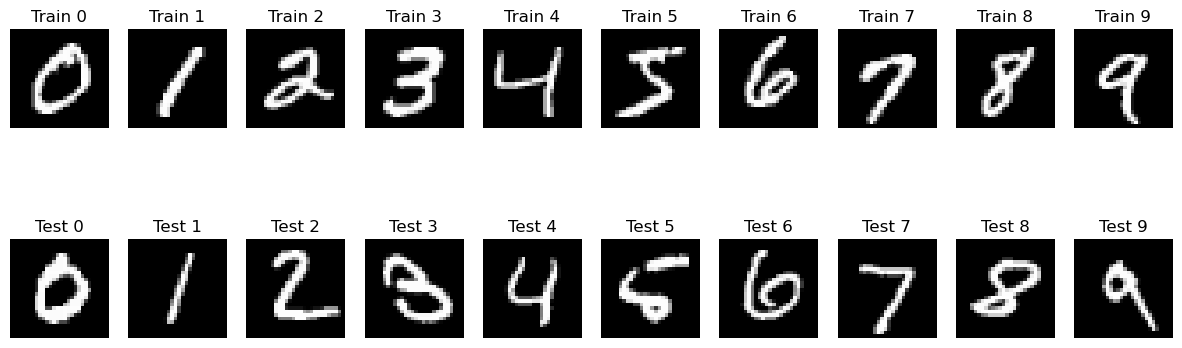

In [28]:
# mnist_data is loaded and contains 'train0', 'train1', ..., 'test0', 'test1', ...

# Create arrays to store reshaped images for train and test sets
some_train_mat = np.zeros((10, 28, 28))
some_test_mat = np.zeros((10, 28, 28))

# Loop through each digit (0 to 9)
for digit in range(10):
    # Access the 'train' and 'test' matrices for the current digit
    train_digit_matrix = mnist_data['train' + str(digit)]
    test_digit_matrix = mnist_data['test' + str(digit)]
    
    # Reshape the first row of the 'train' and 'test' matrices into 28x28 images
    train_Pic_i_sample = np.reshape(train_digit_matrix[0, :], (28, 28))
    test_Pic_i_sample = np.reshape(test_digit_matrix[0, :], (28, 28))
    
    # Store the reshaped images in the respective arrays
    some_train_mat[digit] = train_Pic_i_sample
    some_test_mat[digit] = test_Pic_i_sample


# Display the images from the training set
plt.figure(figsize=(15, 5))
for digit in range(10):
    plt.subplot(2, 10, digit + 1)
    plt.imshow(some_train_mat[digit], cmap='gray')
    plt.title(f'Train {digit}')
    plt.axis('off')

# Display the images from the test set

    plt.subplot(2, 10, digit + 11)
    plt.imshow(some_test_mat[digit], cmap='gray')
    plt.title(f'Test {digit}')
    plt.axis('off')

plt.show()


## Binary logistic regression model

In [29]:
# Sizes of the weights and the samples
vec_w_size = mnist_data['test0'].shape[1]
num_samples_train_1 = mnist_data['train1'].shape[0]
num_samples_train_2 = mnist_data['train2'].shape[0]
num_samples_test_1 = mnist_data['test1'].shape[0]
num_samples_test_2 = mnist_data['test2'].shape[0]
num_of_training_samples = num_samples_train_1 + num_samples_train_2
num_of_test_samples = num_samples_test_1 + num_samples_test_2

epochs = 300  # Number of times for the LR algorithm to run

w_i = np.random.rand(vec_w_size) * 0.0005  # Initial random weights vector
Learning_rate = 0.0001 # Determine the learning rate
Cost_array = np.zeros(epochs) 

# Logistic Regression Loop
# Training the model for digits 1 and 2, note that we chose label 0 for digit 1 and label 1 for digit 2
for epoch in range(epochs):
    Cost_derivatives = np.zeros(vec_w_size)  # Reset the cost function derivative

    # Train set 1
    X_t = mnist_data['train1'].astype(float) # This conversion is often necessary for numerical stability and consistency in numerical operations
    w_mul_x_t = X_t @ w_i
    SigZero = sigmoid(w_mul_x_t) # Sigmoid function
    Cost_derivatives += np.sum((0 - SigZero).reshape(-1, 1) * X_t, axis=0)

    # Train set 2
    X_t = mnist_data['train2'].astype(float) # This conversion is often necessary for numerical stability and consistency in numerical operations
    w_mul_x_t = X_t @ w_i
    SigOne = sigmoid(w_mul_x_t) # Sigmoid function
    Cost_derivatives += np.sum((1 - SigOne).reshape(-1, 1) * X_t, axis=0)

    w_i = w_i + Learning_rate * Cost_derivatives / num_of_training_samples # Updating the weights
    Cost_array[epoch] = (np.sum(np.log(SigOne)) + np.sum(np.log(SigZero))) / (num_of_training_samples) # Updating the Cost array

# Check if the model works on the test samples
X_t = mnist_data['test1'].astype(float)
w_mul_x_t = X_t @ w_i
SigZero = sigmoid(w_mul_x_t)
errors0 = np.sum(SigZero >= 0.5)

X_t = mnist_data['test2'].astype(float)
w_mul_x_t = X_t @ w_i
SigOne = sigmoid(w_mul_x_t)
errors1 = np.sum(SigOne <= 0.5)

# Determine the num of the mistakes and the success rate
Mistakes = errors0 + errors1
SuccessRate = (1 - (Mistakes / num_of_test_samples)) * 100

## Conclusion

as we can see the Cost Function l(w) indeed (Starting from a certain point) increases at each iteration of the optimization.\
also we get the number of the mistakes and the success rate (below the graph):

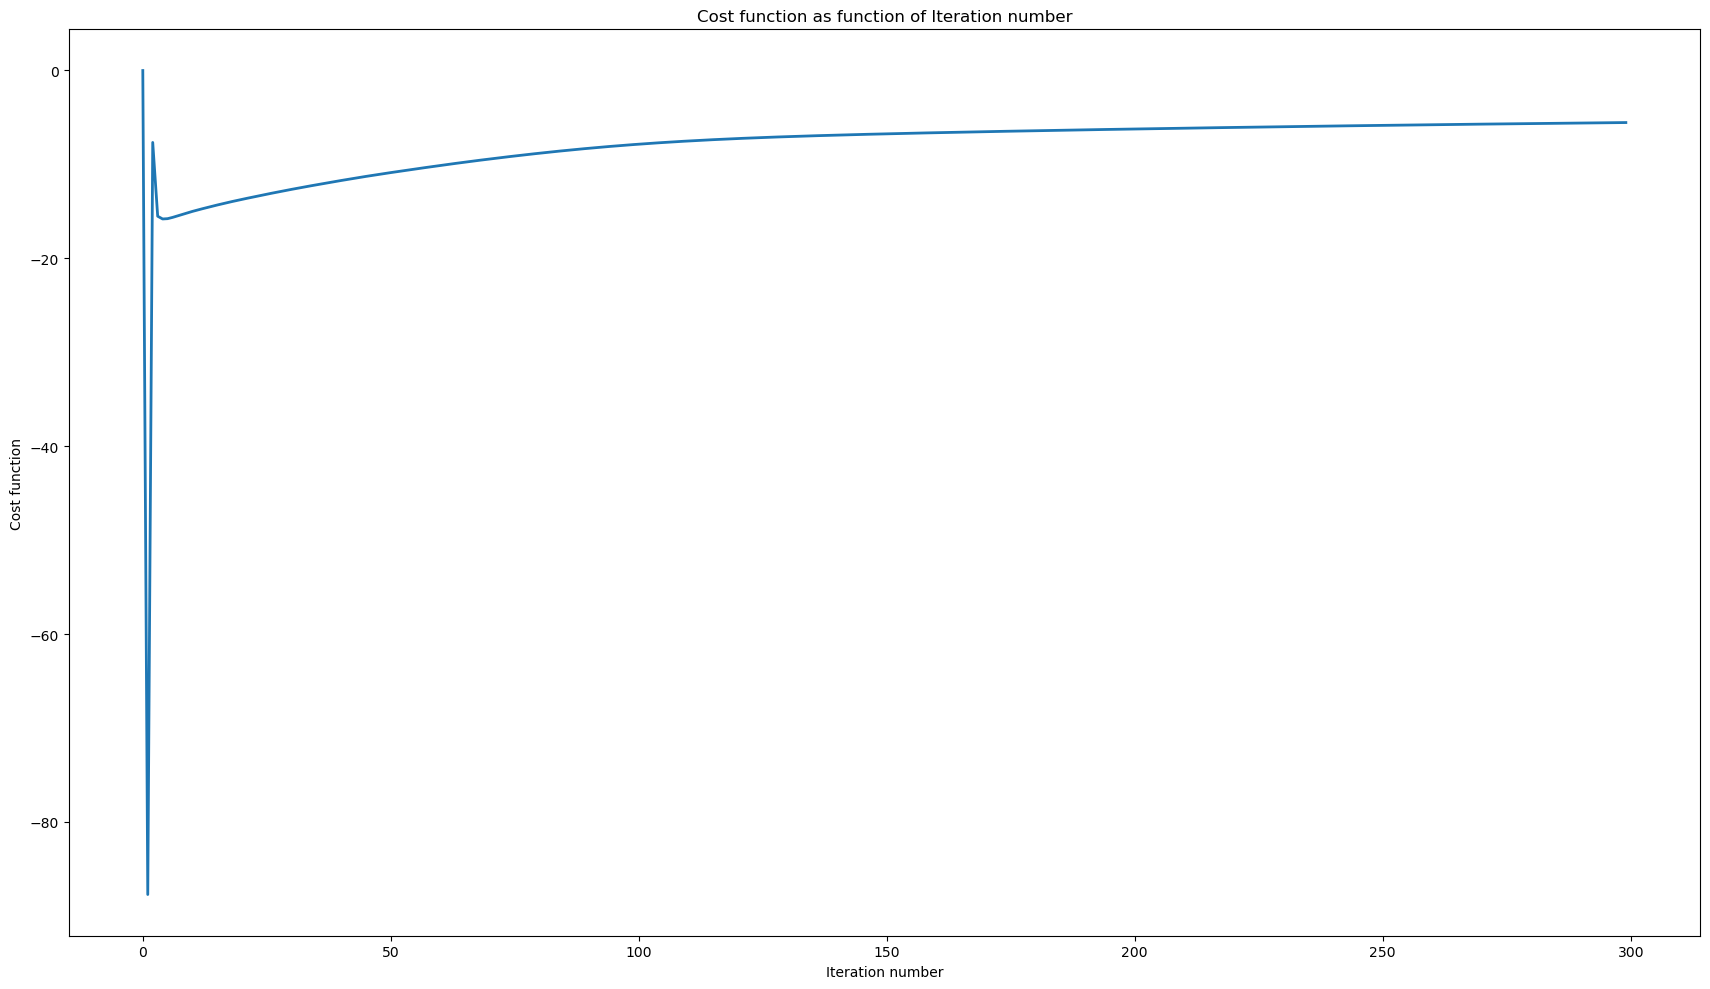

Mistakes: 13 from 2167 samples, Success Rate: 99.4001%


In [32]:
# Plotting the Cost Function
plt.figure(figsize=(17.2, 10))
plt.plot(Cost_array, linewidth=2)
plt.title('Cost function as function of Iteration number')
plt.xlabel('Iteration number')
plt.ylabel('Cost function')
plt.tight_layout()
plt.show()

print(f'Mistakes: {Mistakes} from {num_of_test_samples} samples, Success Rate: {SuccessRate:.4f}%')
